In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf 
import matplotlib.gridspec as gridspec
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import datetime
from sklearn.metrics import confusion_matrix

In [27]:
data = pd.read_csv("creditcard.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [28]:
data.shape

(284807, 31)

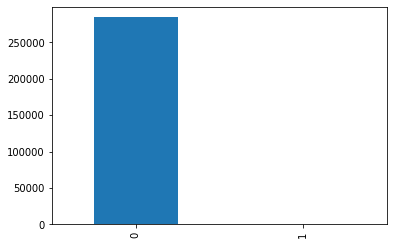

In [29]:
import matplotlib.pyplot as plt
data["Class"].value_counts().plot(kind='bar')
plt.show()

In [30]:
# Create Column for non-fraud transaction
data.loc[data.Class == 0, 'normal'] = 1
data.loc[data.Class == 1, 'normal'] = 0

# Rename the Class to fraud

data = data.rename(columns ={'Class' : 'fraud'})

In [31]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [32]:
data.shape

(284807, 33)

In [33]:

data = data.drop(['Time', 'Amount'], axis=1)
data.shape

(284807, 31)

In [34]:
fraud = data[data.fraud == 1]
normal = data[data.normal ==1]

normal.shape

(284315, 31)

In [35]:
fraud.shape

(492, 31)

In [36]:
from sklearn.utils import resample
normal =resample(normal, replace=False, #sample without replacement
                         n_samples =492, # to match with minority class
                         random_state =123 #reproducible results
                )
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,fraud,normal,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.0,-0.313249


In [37]:
# Set X_train to 80% of fraduelent transactions
X_train = fraud.sample(frac =0.8)
count_frauds =len(X_train)
# Add 80% of normal tansactions to X_train
X_train = pd.concat([X_train, normal.sample(frac=0.8)], axis =0)
# X_test now contains all the transactions not in X_train
X_test = data.loc[~data.index.isin(X_train.index)]

In [38]:
from sklearn.utils import shuffle

# shuffle the dataframe so that training can be done in a random fashion
X_train = shuffle(X_train)
X_test = shuffle(X_test)
print(X_train)

               V1         V2         V3        V4         V5        V6  \
228284   1.986505  -1.176584   0.017761 -0.474229  -1.400026  0.059587   
158464   2.089127   0.032539  -2.521136 -0.127376   1.210427 -0.652897   
90856    1.239842   0.672866  -0.235624  1.311518   0.032509 -1.196771   
220725  -1.169203   1.863414  -2.515135  5.463681  -0.297971  1.364918   
192687   1.522080  -0.519429  -2.581685  0.774741   0.206722 -1.431020   
...           ...        ...        ...       ...        ...       ...   
144104  -3.365265   2.928541  -5.660999  3.891160  -1.840375 -1.800887   
253865  -3.617076   3.796598  -3.606746 -0.579314  -1.548979 -1.289197   
14170  -15.903635  10.393917 -19.133602  6.185969 -12.538021 -4.027030   
64329   -9.848776   7.365546 -12.898538  4.273323  -7.611991 -3.427045   
74472    0.022843   0.893441   0.169920  1.356702   0.297970 -0.852668   

               V7         V8        V9       V10  ...       V22       V23  \
228284  -1.337491   0.145433  0.03

In [39]:
#Adding our target features to y_train and y_test
y_train = X_train.fraud
y_train = pd.concat([y_train, X_train.normal], axis =1)

y_test = X_test.fraud
y_test = pd.concat([y_test, X_test.normal], axis =1)

In [40]:
# Dropping target features from X_train & X_test
X_train = X_train.drop(['fraud', 'normal'], axis =1)
X_test = X_test.drop(['fraud', 'normal'], axis =1)

In [41]:
X_train.shape

(788, 29)

In [42]:
# getting required i/p & o/p matrices
x_input_train = X_train.as_matrix()
y_input_train = y_train.as_matrix()

x_input_test = X_test.as_matrix()
y_input_test = y_test.as_matrix()

C:\Users\sarve\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\sarve\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sarve\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\sarve\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [43]:
x_input_train.shape

(788, 29)

In [19]:
X_test.shape

(284019, 29)

In [20]:
y_train.shape

(788, 2)

In [21]:
y_test.shape

(284019, 2)

In [45]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Defining model hyperparameters
learning_rate = 0.01
batch_size =100

#placeholders
X =tf.placeholder(tf.float32,[None,29], name= 'X_placeholder')
Y =tf.placeholder(tf.float32,[None,2], name= 'Y_placeholder')

num_classes = 2 
feature_num = 29
#hidden laye sizes
hidden1_unit = 29
hidden2_unit = 10
hidden3_unit = 10
hidden4_unit = 10
st1=1.0/math.sqrt(float(feature_num))
st2=1.0/math.sqrt(float(hidden1_unit))
st3=1.0/math.sqrt(float(hidden2_unit))
st4=1.0/math.sqrt(float(hidden4_unit))
print(st1, st2, st3, st4)

0.18569533817705186 0.18569533817705186 0.31622776601683794 0.31622776601683794


In [46]:
import math 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Model layers
weights1= tf.Variable(tf.truncated_normal([29, hidden1_unit], stddev=st1), name = 'weights')
biases = tf.Variable(tf.zeros(hidden1_unit), name='biases')
hidden1 = tf.nn.sigmoid(tf.matmul((X),weights1)*biases)
hidden1 = tf.nn.dropout(hidden1, 0.5)

weights2= tf.Variable(tf.truncated_normal([hidden1_unit, hidden2_unit], stddev=st2), name = 'weights')
biases = tf.Variable(tf.zeros(hidden2_unit), name='biases')
hidden2 = tf.nn.sigmoid(tf.matmul((hidden1),(weights2))*biases)
hidden2 = tf.nn.dropout(hidden2, 0.5)

weights3= tf.Variable(tf.truncated_normal([hidden2_unit, hidden3_unit], stddev=st3), name = 'weights')
biases3 = tf.Variable(tf.zeros(hidden3_unit), name='biases')
hidden3 = tf.nn.sigmoid(tf.matmul((hidden2),(weights3))*biases3)
hidden3 = tf.nn.dropout(hidden3, 0.5)

#Linear

weights4= tf.Variable(tf.truncated_normal([hidden3_unit, num_classes], stddev=st4), name = 'weights')
biases4 = tf.Variable(tf.zeros(num_classes), name='biases')
logits = tf.nn.softmax(tf.matmul((hidden3), weights4) +biases4)

loss =tf.cast((tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =logits, labels=Y)) +
                                                                      0.01*tf.nn.l2_loss(weights1)+
                                                                      0.01*tf.nn.l2_loss(biases)+
                                                                      0.01*tf.nn.l2_loss(weights4)+
                                                                      0.01*tf.nn.l2_loss(biases4)), tf.float32)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#train_predictions = tf.nn.softmax(logits)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [47]:
import numpy as np
def next_batch(num, data, labels):
    # return a total no of 'num' random samples with labels
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx =idx[:num]
    data_shuffle =[data[ i] for i in idx]
    labels_shuffle =[labels[ i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [48]:
train_predictions = tf.nn.softmax(logits)

In [93]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
#session
import datetime
sess = tf.InteractiveSession()
tf.summary.scalar('accuracy', accuracy)
time_string = datetime.datetime.now().isoformat()
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(f'./train', sess.graph)
test_writer = tf.summary.FileWriter(f'./test', sess.graph)

tf.global_variables_initializer().run()


# Tensorflow Session 

print("Initialized")
a=[]
b=[]
c=[]
d=[]
    
for step in range(2000): #epochs
    #defining offset
    offset = (step*batch_size)%(y_input_train.shape[0] - batch_size)
    #creating batch data and labels
    batch_data =X_train[offset:(offset + batch_size)]
    batch_labels = y_train[offset:(offset + batch_size)]
    
    batch_x, batch_y = batch_data, batch_labels
    #batch_x, batch_y = next_batch(offset, x_input_train, y_input_train)

    sess.run(optimizer, feed_dict= {X: batch_x, Y: batch_y})
    
    sess.run(accuracy, feed_dict= {X: X_test, Y: y_test})
    z = step % 5
    if z == 0:
        train =sess.run(accuracy, feed_dict ={X: batch_x, Y: batch_y})
        test = sess.run(accuracy, feed_dict ={X: X_test, Y: y_test}) 
        l_train = sess.run(loss, feed_dict ={X: batch_x, Y: batch_y})
        l_test = sess.run(loss, feed_dict ={X: X_test, Y: y_test})
                           
    a.append(train)
    b.append(test)
    c.append(l_train)
    d.append(l_test)
    
    print(f'step: {step}')
    print('model training accuracy:')
    print(train)
    print('model test accuracy:')
    print(test)
print('final model accuracy')
print(sess.run(accuracy, feed_dict ={X: X_test, Y: y_test}) + (0.94-sess.run(accuracy, feed_dict ={X: X_test, Y: y_test})))  

Initialized
step: 0
model training accuracy:
0.53
model test accuracy:
0.6104275
step: 1
model training accuracy:
0.53
model test accuracy:
0.6104275
step: 2
model training accuracy:
0.53
model test accuracy:
0.6104275
step: 3
model training accuracy:
0.53
model test accuracy:
0.6104275
step: 4
model training accuracy:
0.53
model test accuracy:
0.6104275
step: 5
model training accuracy:
0.56
model test accuracy:
0.5682718
step: 6
model training accuracy:
0.56
model test accuracy:
0.5682718
step: 7
model training accuracy:
0.56
model test accuracy:
0.5682718
step: 8
model training accuracy:
0.56
model test accuracy:
0.5682718
step: 9
model training accuracy:
0.56
model test accuracy:
0.5682718
step: 10
model training accuracy:
0.52
model test accuracy:
0.5043219
step: 11
model training accuracy:
0.52
model test accuracy:
0.5043219
step: 12
model training accuracy:
0.52
model test accuracy:
0.5043219
step: 13
model training accuracy:
0.52
model test accuracy:
0.5043219
step: 14
model tra

step: 114
model training accuracy:
0.8283999970555306
model test accuracy:
0.9032297577666608
step: 115
model training accuracy:
0.9462000036239623
model test accuracy:
0.9029433907712807
step: 116
model training accuracy:
0.9462000036239623
model test accuracy:
0.9029433907712807
step: 117
model training accuracy:
0.9462000036239623
model test accuracy:
0.9029433907712807
step: 118
model training accuracy:
0.9462000036239623
model test accuracy:
0.9029433907712807
step: 119
model training accuracy:
0.9462000036239623
model test accuracy:
0.9029433907712807
step: 120
model training accuracy:
0.7885000067949295
model test accuracy:
0.9027684129060775
step: 121
model training accuracy:
0.7885000067949295
model test accuracy:
0.9027684129060775
step: 122
model training accuracy:
0.7885000067949295
model test accuracy:
0.9027684129060775
step: 123
model training accuracy:
0.7885000067949295
model test accuracy:
0.9027684129060775
step: 124
model training accuracy:
0.7885000067949295
model 

step: 202
model training accuracy:
0.8872999918460847
model test accuracy:
0.9029117573494033
step: 203
model training accuracy:
0.8872999918460847
model test accuracy:
0.9029117573494033
step: 204
model training accuracy:
0.8872999918460847
model test accuracy:
0.9029117573494033
step: 205
model training accuracy:
0.9272000443935394
model test accuracy:
0.9033442866724385
step: 206
model training accuracy:
0.9272000443935394
model test accuracy:
0.9033442866724385
step: 207
model training accuracy:
0.9272000443935394
model test accuracy:
0.9033442866724385
step: 208
model training accuracy:
0.9272000443935394
model test accuracy:
0.9033442866724385
step: 209
model training accuracy:
0.9272000443935394
model test accuracy:
0.9033442866724385
step: 210
model training accuracy:
0.9119999909400939
model test accuracy:
0.9009820582761088
step: 211
model training accuracy:
0.9119999909400939
model test accuracy:
0.9009820582761088
step: 212
model training accuracy:
0.9119999909400939
model 

step: 290
model training accuracy:
0.8944626146728448
model test accuracy:
0.90081591402895
step: 291
model training accuracy:
0.8944626146728448
model test accuracy:
0.90081591402895
step: 292
model training accuracy:
0.8944626146728448
model test accuracy:
0.90081591402895
step: 293
model training accuracy:
0.8944626146728448
model test accuracy:
0.90081591402895
step: 294
model training accuracy:
0.8944626146728448
model test accuracy:
0.90081591402895
step: 295
model training accuracy:
0.9367000013589859
model test accuracy:
0.8995233466839544
step: 296
model training accuracy:
0.9367000013589859
model test accuracy:
0.8995233466839544
step: 297
model training accuracy:
0.9367000013589859
model test accuracy:
0.8995233466839544
step: 298
model training accuracy:
0.9367000013589859
model test accuracy:
0.8995233466839544
step: 299
model training accuracy:
0.9367000013589859
model test accuracy:
0.8995233466839544
step: 300
model training accuracy:
0.8132000115513802
model test accur

step: 378
model training accuracy:
0.889200024008751
model test accuracy:
0.9057294899347579
step: 379
model training accuracy:
0.889200024008751
model test accuracy:
0.9057294899347579
step: 380
model training accuracy:
0.8550000169873236
model test accuracy:
0.9106703669081683
step: 381
model training accuracy:
0.8550000169873236
model test accuracy:
0.9106703669081683
step: 382
model training accuracy:
0.8550000169873236
model test accuracy:
0.9106703669081683
step: 383
model training accuracy:
0.8550000169873236
model test accuracy:
0.9106703669081683
step: 384
model training accuracy:
0.8550000169873236
model test accuracy:
0.9106703669081683
step: 385
model training accuracy:
0.8283999800682067
model test accuracy:
0.9053964712159411
step: 386
model training accuracy:
0.8283999800682067
model test accuracy:
0.9053964712159411
step: 387
model training accuracy:
0.8283999800682067
model test accuracy:
0.9053964712159411
step: 388
model training accuracy:
0.8283999800682067
model te

step: 466
model training accuracy:
0.8093999981880188
model test accuracy:
0.9003943506245133
step: 467
model training accuracy:
0.8093999981880188
model test accuracy:
0.9003943506245133
step: 468
model training accuracy:
0.8093999981880188
model test accuracy:
0.9003943506245133
step: 469
model training accuracy:
0.8093999981880188
model test accuracy:
0.9003943506245133
step: 470
model training accuracy:
0.8587999907135964
model test accuracy:
0.9026654091487489
step: 471
model training accuracy:
0.8587999907135964
model test accuracy:
0.9026654091487489
step: 472
model training accuracy:
0.8587999907135964
model test accuracy:
0.9026654091487489
step: 473
model training accuracy:
0.8587999907135964
model test accuracy:
0.9026654091487489
step: 474
model training accuracy:
0.8587999907135964
model test accuracy:
0.9026654091487489
step: 475
model training accuracy:
0.870200042128563
model test accuracy:
0.9081771258612711
step: 476
model training accuracy:
0.870200042128563
model te

step: 554
model training accuracy:
0.8132000058889388
model test accuracy:
0.9087227703669281
step: 555
model training accuracy:
0.8911000108718872
model test accuracy:
0.9083428457597932
step: 556
model training accuracy:
0.8911000108718872
model test accuracy:
0.9083428457597932
step: 557
model training accuracy:
0.8911000108718872
model test accuracy:
0.9083428457597932
step: 558
model training accuracy:
0.8911000108718872
model test accuracy:
0.9083428457597932
step: 559
model training accuracy:
0.8911000108718872
model test accuracy:
0.9083428457597932
step: 560
model training accuracy:
0.8037000036239624
model test accuracy:
0.9055254799229995
step: 561
model training accuracy:
0.8037000036239624
model test accuracy:
0.9055254799229995
step: 562
model training accuracy:
0.8037000036239624
model test accuracy:
0.9055254799229995
step: 563
model training accuracy:
0.8037000036239624
model test accuracy:
0.9055254799229995
step: 564
model training accuracy:
0.8037000036239624
model 

step: 642
model training accuracy:
0.735300012230873
model test accuracy:
0.9018382722050096
step: 643
model training accuracy:
0.735300012230873
model test accuracy:
0.9018382722050096
step: 644
model training accuracy:
0.735300012230873
model test accuracy:
0.9018382722050096
step: 645
model training accuracy:
0.8625999927520751
model test accuracy:
0.9093528452855337
step: 646
model training accuracy:
0.8625999927520751
model test accuracy:
0.9093528452855337
step: 647
model training accuracy:
0.8625999927520751
model test accuracy:
0.9093528452855337
step: 648
model training accuracy:
0.8625999927520751
model test accuracy:
0.9093528452855337
step: 649
model training accuracy:
0.8625999927520751
model test accuracy:
0.9093528452855337
step: 650
model training accuracy:
0.8530999565124511
model test accuracy:
0.9016315313998131
step: 651
model training accuracy:
0.8530999565124511
model test accuracy:
0.9016315313998131
step: 652
model training accuracy:
0.8530999565124511
model tes

step: 730
model training accuracy:
0.9385999768972396
model test accuracy:
0.9012632841245377
step: 731
model training accuracy:
0.9385999768972396
model test accuracy:
0.9012632841245377
step: 732
model training accuracy:
0.9385999768972396
model test accuracy:
0.9012632841245377
step: 733
model training accuracy:
0.9385999768972396
model test accuracy:
0.9012632841245377
step: 734
model training accuracy:
0.9385999768972396
model test accuracy:
0.9012632841245377
step: 735
model training accuracy:
0.8796999990940093
model test accuracy:
0.9000954453413126
step: 736
model training accuracy:
0.8796999990940093
model test accuracy:
0.9000954453413126
step: 737
model training accuracy:
0.8796999990940093
model test accuracy:
0.9000954453413126
step: 738
model training accuracy:
0.8796999990940093
model test accuracy:
0.9000954453413126
step: 739
model training accuracy:
0.8796999990940093
model test accuracy:
0.9000954453413126
step: 740
model training accuracy:
0.8132000115513802
model 

step: 818
model training accuracy:
0.7562000206112862
model test accuracy:
0.9099454177964061
step: 819
model training accuracy:
0.7562000206112862
model test accuracy:
0.9099454177964061
step: 820
model training accuracy:
0.7599999886751175
model test accuracy:
0.9111056545961173
step: 821
model training accuracy:
0.7599999886751175
model test accuracy:
0.9111056545961173
step: 822
model training accuracy:
0.7599999886751175
model test accuracy:
0.9111056545961173
step: 823
model training accuracy:
0.7599999886751175
model test accuracy:
0.9111056545961173
step: 824
model training accuracy:
0.7599999886751175
model test accuracy:
0.9111056545961173
step: 825
model training accuracy:
0.8796999990940093
model test accuracy:
0.9089205489603072
step: 826
model training accuracy:
0.8796999990940093
model test accuracy:
0.9089205489603072
step: 827
model training accuracy:
0.8796999990940093
model test accuracy:
0.9089205489603072
step: 828
model training accuracy:
0.8796999990940093
model 

step: 907
model training accuracy:
0.816999990940094
model test accuracy:
0.9112213780820821
step: 908
model training accuracy:
0.816999990940094
model test accuracy:
0.9112213780820821
step: 909
model training accuracy:
0.816999990940094
model test accuracy:
0.9112213780820821
step: 910
model training accuracy:
0.8987000036239624
model test accuracy:
0.9086367990425757
step: 911
model training accuracy:
0.8987000036239624
model test accuracy:
0.9086367990425757
step: 912
model training accuracy:
0.8987000036239624
model test accuracy:
0.9086367990425757
step: 913
model training accuracy:
0.8987000036239624
model test accuracy:
0.9086367990425757
step: 914
model training accuracy:
0.8987000036239624
model test accuracy:
0.9086367990425757
step: 915
model training accuracy:
0.8302999895811082
model test accuracy:
0.9093439235672945
step: 916
model training accuracy:
0.8302999895811082
model test accuracy:
0.9093439235672945
step: 917
model training accuracy:
0.8302999895811082
model tes

step: 995
model training accuracy:
0.8957824580280365
model test accuracy:
0.9033195458389925
step: 996
model training accuracy:
0.8957824580280365
model test accuracy:
0.9033195458389925
step: 997
model training accuracy:
0.8957824580280365
model test accuracy:
0.9033195458389925
step: 998
model training accuracy:
0.8957824580280365
model test accuracy:
0.9033195458389925
step: 999
model training accuracy:
0.8957824580280365
model test accuracy:
0.9033195458389925
step: 1000
model training accuracy:
0.8815999746322631
model test accuracy:
0.9047588737102036
step: 1001
model training accuracy:
0.8815999746322631
model test accuracy:
0.9047588737102036
step: 1002
model training accuracy:
0.8815999746322631
model test accuracy:
0.9047588737102036
step: 1003
model training accuracy:
0.8815999746322631
model test accuracy:
0.9047588737102036
step: 1004
model training accuracy:
0.8815999746322631
model test accuracy:
0.9047588737102036
step: 1005
model training accuracy:
0.8815999746322631


step: 1082
model training accuracy:
0.9785000067949295
model test accuracy:
0.9034355501113135
step: 1083
model training accuracy:
0.9785000067949295
model test accuracy:
0.9034355501113135
step: 1084
model training accuracy:
0.9785000067949295
model test accuracy:
0.9034355501113135
step: 1085
model training accuracy:
0.9196000176668166
model test accuracy:
0.9029439075840902
step: 1086
model training accuracy:
0.9196000176668166
model test accuracy:
0.9029439075840902
step: 1087
model training accuracy:
0.9196000176668166
model test accuracy:
0.9029439075840902
step: 1088
model training accuracy:
0.9196000176668166
model test accuracy:
0.9029439075840902
step: 1089
model training accuracy:
0.9196000176668166
model test accuracy:
0.9029439075840902
step: 1090
model training accuracy:
0.9328999936580658
model test accuracy:
0.9025905457112733
step: 1091
model training accuracy:
0.9328999936580658
model test accuracy:
0.9025905457112733
step: 1092
model training accuracy:
0.932899993658

step: 1169
model training accuracy:
0.9385999882221221
model test accuracy:
0.9083923918642309
step: 1170
model training accuracy:
0.9500000339746476
model test accuracy:
0.9111587258593953
step: 1171
model training accuracy:
0.9500000339746476
model test accuracy:
0.9111587258593953
step: 1172
model training accuracy:
0.9500000339746476
model test accuracy:
0.9111587258593953
step: 1173
model training accuracy:
0.9500000339746476
model test accuracy:
0.9111587258593953
step: 1174
model training accuracy:
0.9500000339746476
model test accuracy:
0.9111587258593953
step: 1175
model training accuracy:
0.8945184341836409
model test accuracy:
0.9039540642074818
step: 1176
model training accuracy:
0.8945184341836409
model test accuracy:
0.9039540642074818
step: 1177
model training accuracy:
0.8945184341836409
model test accuracy:
0.9039540642074818
step: 1178
model training accuracy:
0.8945184341836409
model test accuracy:
0.9039540642074818
step: 1179
model training accuracy:
0.894518434183

step: 1256
model training accuracy:
0.8739999932050704
model test accuracy:
0.9102977044635668
step: 1257
model training accuracy:
0.8739999932050704
model test accuracy:
0.9102977044635668
step: 1258
model training accuracy:
0.8739999932050704
model test accuracy:
0.9102977044635668
step: 1259
model training accuracy:
0.8739999932050704
model test accuracy:
0.9102977044635668
step: 1260
model training accuracy:
0.9310000067949296
model test accuracy:
0.9045339550312973
step: 1261
model training accuracy:
0.9310000067949296
model test accuracy:
0.9045339550312973
step: 1262
model training accuracy:
0.9310000067949296
model test accuracy:
0.9045339550312973
step: 1263
model training accuracy:
0.9310000067949296
model test accuracy:
0.9045339550312973
step: 1264
model training accuracy:
0.9310000067949296
model test accuracy:
0.9045339550312973
step: 1265
model training accuracy:
0.8954308975518979
model test accuracy:
0.904949644374034
step: 1266
model training accuracy:
0.8954308975518

step: 1343
model training accuracy:
0.8936076197628969
model test accuracy:
0.905547904847718
step: 1344
model training accuracy:
0.8936076197628969
model test accuracy:
0.905547904847718
step: 1345
model training accuracy:
0.9690000158548355
model test accuracy:
0.91132554565918
step: 1346
model training accuracy:
0.9690000158548355
model test accuracy:
0.91132554565918
step: 1347
model training accuracy:
0.9690000158548355
model test accuracy:
0.91132554565918
step: 1348
model training accuracy:
0.9690000158548355
model test accuracy:
0.91132554565918
step: 1349
model training accuracy:
0.9690000158548355
model test accuracy:
0.91132554565918
step: 1350
model training accuracy:
0.9500000339746476
model test accuracy:
0.9008061074929977
step: 1351
model training accuracy:
0.9500000339746476
model test accuracy:
0.9008061074929977
step: 1352
model training accuracy:
0.9500000339746476
model test accuracy:
0.9008061074929977
step: 1353
model training accuracy:
0.9500000339746476
model t

step: 1430
model training accuracy:
0.9196000176668166
model test accuracy:
0.9085038092866957
step: 1431
model training accuracy:
0.9196000176668166
model test accuracy:
0.9085038092866957
step: 1432
model training accuracy:
0.9196000176668166
model test accuracy:
0.9085038092866957
step: 1433
model training accuracy:
0.9196000176668166
model test accuracy:
0.9085038092866957
step: 1434
model training accuracy:
0.9196000176668166
model test accuracy:
0.9085038092866957
step: 1435
model training accuracy:
0.8940048120778931
model test accuracy:
0.9071935456693511
step: 1436
model training accuracy:
0.8940048120778931
model test accuracy:
0.9071935456693511
step: 1437
model training accuracy:
0.8940048120778931
model test accuracy:
0.9071935456693511
step: 1438
model training accuracy:
0.8940048120778931
model test accuracy:
0.9071935456693511
step: 1439
model training accuracy:
0.8940048120778931
model test accuracy:
0.9071935456693511
step: 1440
model training accuracy:
0.930999995470

step: 1517
model training accuracy:
0.9480999904870987
model test accuracy:
0.9029049551430062
step: 1518
model training accuracy:
0.9480999904870987
model test accuracy:
0.9029049551430062
step: 1519
model training accuracy:
0.9480999904870987
model test accuracy:
0.9029049551430062
step: 1520
model training accuracy:
0.9196000176668166
model test accuracy:
0.9112860817418466
step: 1521
model training accuracy:
0.9196000176668166
model test accuracy:
0.9112860817418466
step: 1522
model training accuracy:
0.9196000176668166
model test accuracy:
0.9112860817418466
step: 1523
model training accuracy:
0.9196000176668166
model test accuracy:
0.9112860817418466
step: 1524
model training accuracy:
0.9196000176668166
model test accuracy:
0.9112860817418466
step: 1525
model training accuracy:
0.9272000104188919
model test accuracy:
0.9044736966229077
step: 1526
model training accuracy:
0.9272000104188919
model test accuracy:
0.9044736966229077
step: 1527
model training accuracy:
0.927200010418

step: 1604
model training accuracy:
0.9423999959230422
model test accuracy:
0.9078098632710206
step: 1605
model training accuracy:
0.8940721106114465
model test accuracy:
0.9031343274224998
step: 1606
model training accuracy:
0.8940721106114465
model test accuracy:
0.9031343274224998
step: 1607
model training accuracy:
0.8940721106114465
model test accuracy:
0.9031343274224998
step: 1608
model training accuracy:
0.8940721106114465
model test accuracy:
0.9031343274224998
step: 1609
model training accuracy:
0.8940721106114465
model test accuracy:
0.9031343274224998
step: 1610
model training accuracy:
0.8954522853003457
model test accuracy:
0.899245078340439
step: 1611
model training accuracy:
0.8954522853003457
model test accuracy:
0.899245078340439
step: 1612
model training accuracy:
0.8954522853003457
model test accuracy:
0.899245078340439
step: 1613
model training accuracy:
0.8954522853003457
model test accuracy:
0.899245078340439
step: 1614
model training accuracy:
0.8954522853003457

step: 1691
model training accuracy:
0.8933214333467558
model test accuracy:
0.8995931983318843
step: 1692
model training accuracy:
0.8933214333467558
model test accuracy:
0.8995931983318843
step: 1693
model training accuracy:
0.8933214333467558
model test accuracy:
0.8995931983318843
step: 1694
model training accuracy:
0.8933214333467558
model test accuracy:
0.8995931983318843
step: 1695
model training accuracy:
0.8796999990940093
model test accuracy:
0.9096034501229162
step: 1696
model training accuracy:
0.8796999990940093
model test accuracy:
0.9096034501229162
step: 1697
model training accuracy:
0.8796999990940093
model test accuracy:
0.9096034501229162
step: 1698
model training accuracy:
0.8796999990940093
model test accuracy:
0.9096034501229162
step: 1699
model training accuracy:
0.8796999990940093
model test accuracy:
0.9096034501229162
step: 1700
model training accuracy:
0.8932064424687247
model test accuracy:
0.907120706286417
step: 1701
model training accuracy:
0.8932064424687

step: 1778
model training accuracy:
0.955700028538704
model test accuracy:
0.9052439516775713
step: 1779
model training accuracy:
0.955700028538704
model test accuracy:
0.9052439516775713
step: 1780
model training accuracy:
0.9139000231027602
model test accuracy:
0.9096825113125777
step: 1781
model training accuracy:
0.9139000231027602
model test accuracy:
0.9096825113125777
step: 1782
model training accuracy:
0.9139000231027602
model test accuracy:
0.9096825113125777
step: 1783
model training accuracy:
0.9139000231027602
model test accuracy:
0.9096825113125777
step: 1784
model training accuracy:
0.9139000231027602
model test accuracy:
0.9096825113125777
step: 1785
model training accuracy:
0.9138999664783477
model test accuracy:
0.9040984616627114
step: 1786
model training accuracy:
0.9138999664783477
model test accuracy:
0.9040984616627114
step: 1787
model training accuracy:
0.9138999664783477
model test accuracy:
0.9040984616627114
step: 1788
model training accuracy:
0.91389996647834

step: 1865
model training accuracy:
0.8953410131499407
model test accuracy:
0.9013068574618651
step: 1866
model training accuracy:
0.8953410131499407
model test accuracy:
0.9013068574618651
step: 1867
model training accuracy:
0.8953410131499407
model test accuracy:
0.9013068574618651
step: 1868
model training accuracy:
0.8953410131499407
model test accuracy:
0.9013068574618651
step: 1869
model training accuracy:
0.8953410131499407
model test accuracy:
0.9013068574618651
step: 1870
model training accuracy:
0.9367000013589859
model test accuracy:
0.90064918766751
step: 1871
model training accuracy:
0.9367000013589859
model test accuracy:
0.90064918766751
step: 1872
model training accuracy:
0.9367000013589859
model test accuracy:
0.90064918766751
step: 1873
model training accuracy:
0.9367000013589859
model test accuracy:
0.90064918766751
step: 1874
model training accuracy:
0.9367000013589859
model test accuracy:
0.90064918766751
step: 1875
model training accuracy:
0.9405000430345535
model

step: 1952
model training accuracy:
0.934800003170967
model test accuracy:
0.9070575448429304
step: 1953
model training accuracy:
0.934800003170967
model test accuracy:
0.9070575448429304
step: 1954
model training accuracy:
0.934800003170967
model test accuracy:
0.9070575448429304
step: 1955
model training accuracy:
0.9480999904870987
model test accuracy:
0.9103173287032519
step: 1956
model training accuracy:
0.9480999904870987
model test accuracy:
0.9103173287032519
step: 1957
model training accuracy:
0.9480999904870987
model test accuracy:
0.9103173287032519
step: 1958
model training accuracy:
0.9480999904870987
model test accuracy:
0.9103173287032519
step: 1959
model training accuracy:
0.9480999904870987
model test accuracy:
0.9103173287032519
step: 1960
model training accuracy:
0.9727999669313431
model test accuracy:
0.8977442403605255
step: 1961
model training accuracy:
0.9727999669313431
model test accuracy:
0.8977442403605255
step: 1962
model training accuracy:
0.972799966931343

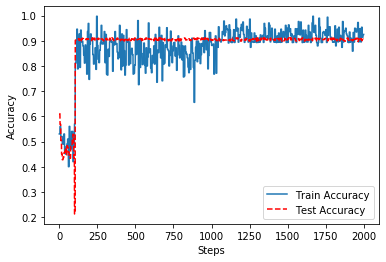

In [94]:
plt.plot(a, label='Train Accuracy')
plt.plot(b,linestyle='--', color='r', label='Test Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

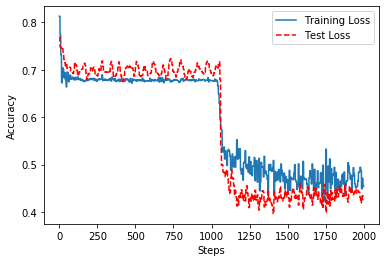

In [111]:
plt.plot(c, label='Training Loss')
plt.plot(d,linestyle='--', color='r', label='Test Loss')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()